In [1]:
from maxent_disaggregation import maxent_disagg
import numpy as np

In [ ]:
mean = 10
sd = 2
shares = [0.2, 0.3, 0.2, np.nan, np.nan]
sds=[0.05,0.2,np.nan, 0.1, np.nan]
min_0 = -1
max_0 = 100

In [3]:
samples, gamma = maxent_disagg(n=10000, mean_0=mean, sd_0=sd, shares=shares, sds=None,log=True, grad_based=True)
print("#######")
print(gamma)
print(samples.mean(axis=0))

#######
6.364498190685046
[5.98609647 3.02595926 0.99323515]


In [13]:
samples[:,0].mean(), samples[:,0].std(), samples[:,1].mean(), samples[:,1].std(), samples[:,2].mean(), samples[:,2].std()

(np.float64(6.289334070585978),
 np.float64(1.7945312559919973),
 np.float64(2.7799540333142665),
 np.float64(1.4329210762297262),
 np.float64(0.9540300892865095),
 np.float64(0.8771202758956994))

In [14]:
sample = np.random.beta(0.5, 0.5, size=100)


In [33]:
sample.mean()

np.float64(0.5106634097909937)

In [34]:
sample.std()

np.float64(0.37181775866466604)

In [35]:
sample.sum()

np.float64(51.066340979099365)

In [6]:
from scipy.special import beta

In [14]:
c[:,0].reshape(-1,1)

array([[1],
       [3],
       [5]])

In [15]:
a = np.ones((3,15))
b = np.ones((3,40))*10
c = np.arange(6).reshape(3,2)+1
(c[:,0].reshape(-1,1) * a)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [8]:
test = [np.nan, np.nan, 1, 2, 3]
x = np.isnan(test).sum()
np.array([10,3])/x

array([5. , 1.5])

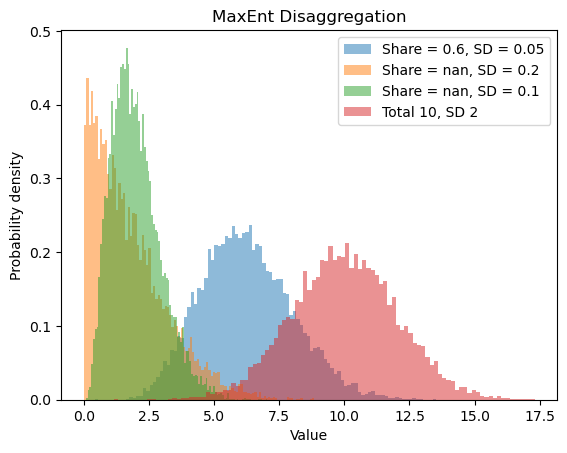

In [ ]:
import matplotlib.pyplot as plt
for i in range(3):
    if sds is not None:
        std = sds[i]
    else:
        std = sds
    if shares is not None:
        share = shares[i]
    else:
        share = shares
    plt.hist(samples[:,i], bins=100, alpha=0.5, label=f'Share = {share}, SD = {std}', density=True)
plt.hist(samples.sum(axis=1), bins=100, alpha=0.5, label=f'Total {mean}, SD {sd}', density=True)
plt.legend()
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.title('MaxEnt Disaggregation')
plt.show()

In [39]:
def dir_gamma(n, shares, gamma_par, threshold=1e-2):
    alpha = gamma_par * shares
    l = len(alpha)
    rate = np.ones(l)
    rate[alpha < threshold] = 1 / alpha[alpha < threshold]
    alpha[alpha < threshold] = 1
    x = gamma.rvs(alpha, scale=1 / rate, size=(n, l))
    sample = x / x.sum(axis=1, keepdims=True)
    return sample

In [43]:
from scipy.stats import gamma

In [78]:
n=10000
shares = np.array([0.8, 0.195, 0.001, 0.004])
gamma_par = 2

In [84]:
%%time
samples = dir_gamma(n, shares, gamma_par)

CPU times: user 2.32 ms, sys: 1.03 ms, total: 3.35 ms
Wall time: 2.02 ms


In [85]:
%%time
samples2 = dirichlet.rvs(shares*gamma_par, size=n)

CPU times: user 2.78 ms, sys: 1.38 ms, total: 4.16 ms
Wall time: 2.3 ms


In [86]:
samples.mean(axis=0), samples.std(axis=0), samples2.mean(axis=0), samples2.std(axis=0)

(array([0.79683129, 0.19351032, 0.00197968, 0.00767871]),
 array([0.22710966, 0.22673709, 0.0063854 , 0.01644371]),
 array([0.80095929, 0.19391782, 0.00106811, 0.00405478]),
 array([0.22798228, 0.22568835, 0.0168378 , 0.03819851]))

In [87]:
samples.mean(axis=0)/samples2.mean(axis=0), samples.std(axis=0)/samples2.std(axis=0)

(array([0.99484618, 0.9978986 , 1.85344794, 1.89374126]),
 array([0.99617243, 1.00464685, 0.37923018, 0.43048042]))

In [88]:
samples.mean(axis=0)/shares, samples2.mean(axis=0)/shares

(array([0.99603912, 0.99236061, 1.9796772 , 1.91967782]),
 array([1.00119912, 0.99445035, 1.0681051 , 1.01369594]))